# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** XXXX

**Author 1 (sciper):** Louis Le Guillouzic (286876)  
**Author 2 (sciper):** Hugo Masson (314886)   
**Author 3 (sciper):** XXXX (XXXXXX)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [2]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

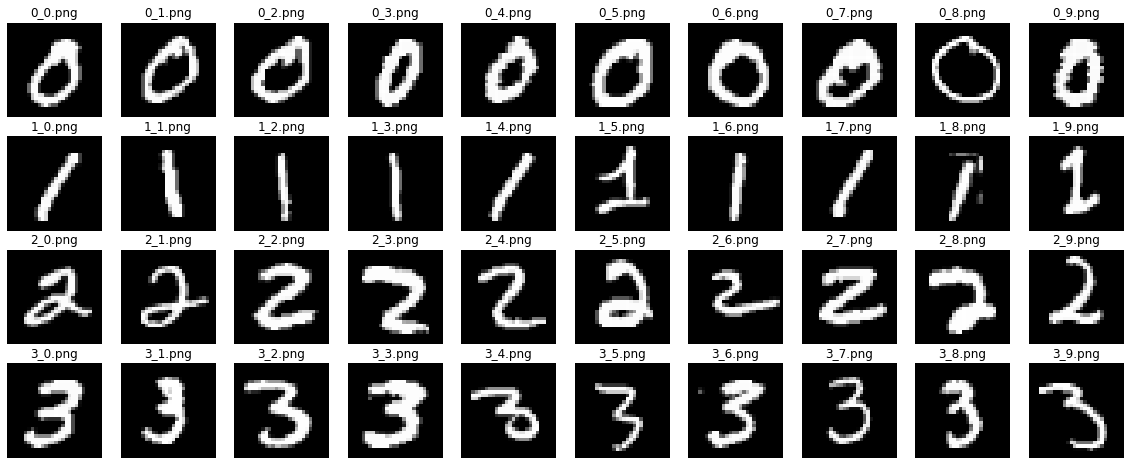

In [3]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

Binarisation --> only black or white
Filter to better identify

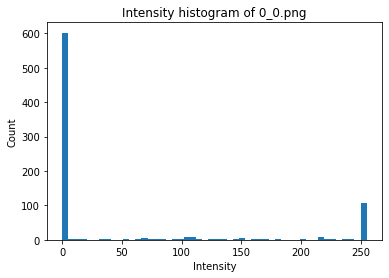

<function matplotlib.pyplot.show(close=None, block=None)>

In [4]:
plt.hist(zeros_im[3].ravel(), bins=50)
plt.title('Intensity histogram of 0_0.png')
plt.ylabel('Count')
plt.xlabel('Intensity')
plt.show()
plt.show

We can observe that the image contains mainly pixels with two intensities, 0 and 256. To remove the "noisy" pixels in the middle, we can apply a binarisation technique using Otsu's method. This method calculates an optimal threshold value that separates the pixels into two classes, foreground and background. Then, all pixels below the threshold are set to 0 (black) and all pixels above the threshold are set to 1 (white). This results in a binary image with only two pixel values, which simplifies further processing.

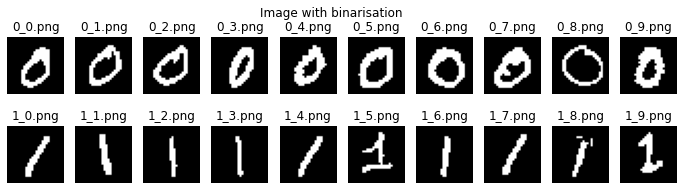

In [5]:
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt

def binarisation(im):
    threshold = threshold_otsu(im)
    binary = np.asarray((im > threshold).astype(float))
    binary[binary==1] = 255
    return binary

zeros = []
ones = []

fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    binary0 = binarisation(im)
    zeros.append(binary0)
    ax.imshow(binary0, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], ones_im, ones_names):
    one = binarisation(im)
    ones.append(one)
    ax.imshow(one, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
    
fig.suptitle("Image with binarisation")
plt.show()


In [6]:
import numpy as np
from skimage.measure import find_contours


def contours(number):
    ''' 
    Return a list of the contours of the given list of number
    '''
    cst_value_contour = 2

    number = np.asarray(number)

    if number.ndim == 2:  # Only one number
        temp = np.asarray(find_contours(number, cst_value_contour))
        #temp[:, 0] = number.shape[0] - temp[:, 0]  # flip y-coordinates
        return temp

    number_contour = []

    for i in range(number.shape[0]):

        temp = find_contours(number[i], cst_value_contour)

        if len(temp) == 1:  # we found only one contour
            temp = np.squeeze(temp)
            number_contour.append(temp)
        else:  # We found a list of contour (, so it's a 0.) We take the first one (first to be find is the outer part)
            temp = np.squeeze(temp[0])
            number_contour.append(temp)

    return number_contour


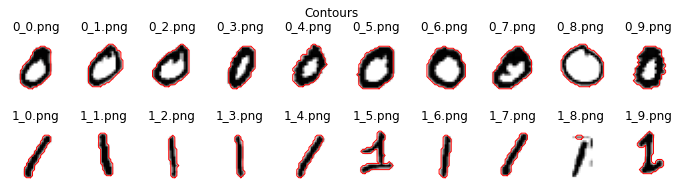

In [7]:
zero_cont=contours(zeros)
ones_cont=contours(ones)
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))

for ax, cont, nm, orig in zip(axes[0], zero_cont, zeros_names, zeros_im):
    # invert the colormap to make the form white
    ax.imshow(orig, cmap='gray_r')
    # plot the contour in red
    ax.plot(cont[:,1],cont[:,0], c='red', linewidth=1)
    ax.axis('off')
    ax.set_title(nm)

for ax, cont, nm, orig in zip(axes[1], ones_cont, ones_names, ones_im):
    # invert the colormap to make the form white
    ax.imshow(orig, cmap='gray_r')
    # plot the contour in red
    ax.plot(cont[:,1],cont[:,0], c='red', linewidth=1)
    ax.axis('off')
    ax.set_title(nm)
    
fig.suptitle("Contours")
plt.show()


#### Discussion

As we can see the only one that fail was the 1_8 because there were some other form than the 1. To remove it we can do an opening to only keep the pixels that form the digit 1.

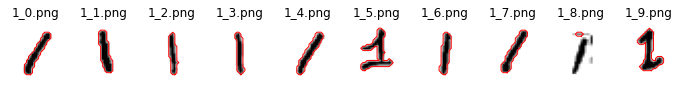

In [8]:
from skimage.morphology import square
from skimage.morphology.binary import binary_opening
    
# Opening on 1_8.png
ones[8] = binary_opening(ones[8], square(8))
ones[8][ones[8] == 1] = 255 

fig, axes = plt.subplots(1, len(ones), figsize=(12, 3))

for ax, cont, nm, orig in zip(axes, ones_cont, ones_names, ones_im):
    # invert the colormap to make the form white
    ax.imshow(orig, cmap='gray_r')
    # plot the contour in red
    ax.plot(cont[:,1],cont[:,0], c='red', linewidth=1)
    ax.axis('off')
    ax.set_title(nm)

### 1.2. Get descriptors (4 pts)

Find contour : we can use the function find_contour from skimage

In [9]:
x0 = find_contours(zeros_im[0],2)
print(len(x0))
x1 = find_contours(ones_im[0],2)
print(len(x1))

2
1


In [10]:
import cv2

def get_descriptors(img):
    descriptors = []
    sift = cv2.SIFT_create()
     # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)


    return descriptors
    descriptors.append(descriptor)
    # TODO
    
    return descriptors

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors(zeros_im[0])[:10])

[[  6.   0.   0. ...   5.  30.   2.]
 [ 13.   1.   0. ...  26. 124.  76.]
 [  0.   0.   0. ...  96.  66.  15.]
 ...
 [ 19.   0.   0. ...   5.   0.   0.]
 [  6.   0.   0. ...  93.  70.   8.]
 [  0.   0.   0. ...   5.   1.   5.]]


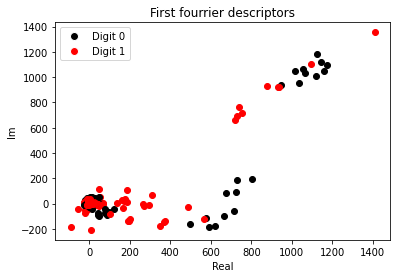

In [11]:
# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.

def fourrier(contour):
    FFTs = []
    if len(contour) > 0:
        u_k = contour[:, 0] + 1j * contour[:, 1]   # create the complex number
        FFT = np.fft.fft(u_k)          # compute the Fourier transform
        FFTs.append(FFT)
        return np.concatenate(FFTs)         # concatenate all the Fourier transforms into a single array
    else:
        return np.array(FFTs)



from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Digit 0',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Digit 1',
                          markerfacecolor='r', markersize=8)]
plt.figure()
plt.title('First fourrier descriptors')
plt.xlabel('Real')
plt.ylabel('Im')
plt.legend(handles=legend_elements)

for ct0, ct1, nm0, nm1 in zip(zero_cont, ones_cont, zeros_names, ones_names):
    # Digit 0
    fft0 = fourrier(ct0)
    plt.scatter(fft0.real, fft0.imag, c='k')
    
    # Digit 1
    fft1 = fourrier(ct1)
    plt.scatter(fft1.real, fft1.imag, c='r')



Now we only plot the first 2 amplitude

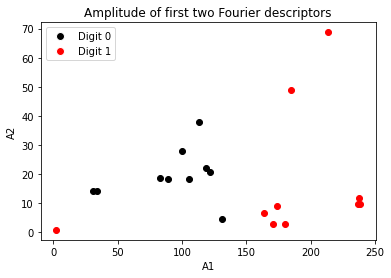

In [12]:
def plotFourier(zeros, ones, name0=zeros_names, name1=ones_names, handle_legend=legend_elements):
    plt.figure()
    plt.title('Amplitude of first two Fourier descriptors')
    plt.xlabel('A1')
    plt.ylabel('A2')
    plt.legend(handles=handle_legend)

    for im0, im1, nm0, nm1 in zip(zeros, ones, name0, name1):
    
        # Digit 0
        fft0 = fourrier(im0)
        A1_0 = abs(fft0[1]) # First amplitude
        A2_0 = abs(fft0[2]) # Second amplitude
        plt.scatter(A1_0, A2_0, c='k')
    
        # Digit 1
        fft1 = fourrier(im1)
        A1_1 = abs(fft1[1]) # First amplitude
        A2_1 = abs(fft1[2]) # Second amplitude
        plt.scatter(A1_1, A2_1, c='r')

plotFourier(zero_cont, ones_cont)

We can see that the 0 digit are on the left part of the plot while the 1 digit are on the right (except one), thus the amplitudes of the first two Fourier descriptors seem to be good features.

### 1.3. Study effect of descriptors (6 pts)

In [13]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zero_cont[0]
one = ones_cont[0]

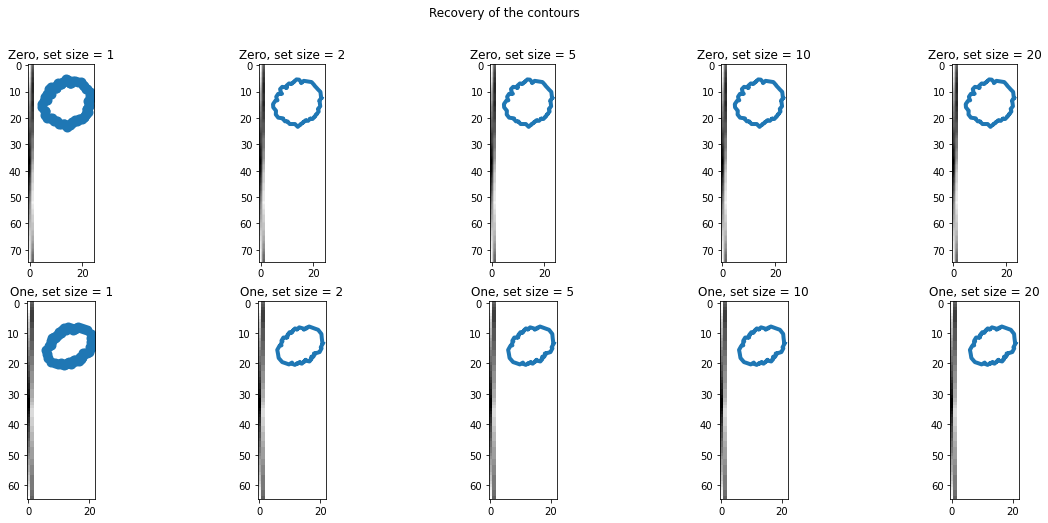

In [37]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zero_cont[4]
one = ones_cont[7]

fft0 = fourrier(zero)
fft1 = fourrier(one)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Plot recovery for a zero image
for i in range(0, 5):
    # Reconstruction using different amounts of descriptors
    fft_desc_0= fft0
    fft_desc_0[descr_set_sizes[i]:len(descr_set_sizes)]=0
    ifft_contour_0 = np.fft.ifft(fft_desc_0)
    reconst_contour_0 = np.zeros((ifft_contour_0.shape[0], 2))
    reconst_contour_0[:,1] = np.real(ifft_contour_0)
    reconst_contour_0[:,0] = np.imag(ifft_contour_0)
    # Plot the reconstructed contour
    axes[0,i].imshow(zero, cmap='gray')
    if i==0:
        axes[0,i].scatter(reconst_contour_0[:, 1], reconst_contour_0[:, 0], linewidth=4)
    else:
        axes[0,i].plot(reconst_contour_0[:, 1], reconst_contour_0[:, 0], linewidth=4)
    axes[0,i].set_title("Zero, set size = " + str(descr_set_sizes[i]))
    axes[0,i].set_aspect('equal')  # Set aspect ratio to be equal

# Plot recovery for a one image
for i in range(0, 5):
    # Reconstruction using different amounts of descriptors
    fft_desc_1= fft1
    fft_desc_1[descr_set_sizes[i]:len(descr_set_sizes)]=0
    ifft_contour_1 = np.fft.ifft(fft_desc_1)
    reconst_contour_1 = np.zeros((ifft_contour_1.shape[0], 2))
    reconst_contour_1[:,1] = np.real(ifft_contour_1)
    reconst_contour_1[:,0] = np.imag(ifft_contour_1)
    # Plot the reconstructed contour
    axes[1,i].imshow(one, cmap='gray')
    if i==0:
        axes[1,i].scatter(reconst_contour_1[:, 1], reconst_contour_1[:, 0], linewidth=4)
    else:
        axes[1,i].plot(reconst_contour_1[:, 1], reconst_contour_1[:, 0], linewidth=4)
    axes[1,i].set_title("One, set size = " + str(descr_set_sizes[i]))
    axes[1,i].set_aspect('equal')  # Set aspect ratio to be equal

fig.suptitle("Recovery of the contours")
plt.show()




#### Discussion

TODO

### 1.4 Clustering (2 pts)

In [28]:
# Extract 2D feature vectors
zero_features = np.abs(fourrier(zero).reshape(-1, 2)[:, :2])
one_features = np.abs(fourrier(one).reshape(-1, 2)[:, :2])

# Plot feature vectors
plt.scatter(zero_features[:, 0], zero_features[:, 1], label='Zero')
plt.scatter(one_features[:, 0], one_features[:, 1], label='One')
plt.xlabel('Frequency 1')
plt.ylabel('Frequency 2')
plt.legend()
plt.show()


ValueError: cannot reshape array of size 69 into shape (2)

In [ ]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = []
# Second feature for all "0"s
zeros_f2 = []
# Fist feature for all "1"s
ones_f1 = []
# Second feature for all "1"s
ones_f2 = []

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


TODO

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

TODO

#### Implementation

In [ ]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    pass

In [ ]:
# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    # TODO
    pass

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img):
    # TODO
    pass
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img):
    # TODO
    pass

In [ ]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = []
rotated_images_ones = []

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = []
translated_images_ones = []

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = []
scaled_images_ones = []

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = []
transformed_images_ones = []

In [ ]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!


# TODO

#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

In [ ]:
# TODO

In [ ]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = []
twos_f2 = []
threes_f1 = []
threes_f2 = []

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

In [ ]:
# TODO: Make the 1D plot of the compacity

####  Discussion

TODO

### 2.2. Additional method (4 pts)

In [ ]:
# TODO

#### Discussion

TODO